# Assignment 11
1. Pick this code https://github.com/amitdoda1983/EVA-Session-6/blob/master/6A_M6_Amit_Doda.ipynb
2. Add CutOut to this
3. Use LR Finder to find the best starting learning rate
4. Use SDG with Momentum
5. Train for 100 Epochs. [Keep Verbose = 0 (no logs)] 
6. Print the top accuracy
7. Show Training and Test Accuracy curves
8. Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
9. Submit

## Step1: Pick this code
https://github.com/amitdoda1983/EVA-Session-6/blob/master/6A_M6_Amit_Doda.ipynb

### Preparing the Base Model

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras import optimizers

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


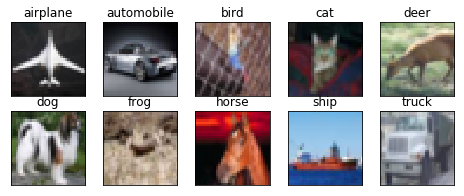

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 25s 63ms/step - loss: 1.8639 - acc: 0.2878 - val_loss: 1.4705 - val_acc: 0.4465
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.3620 - acc: 0.5050 - val_loss: 1.1170 - val_acc: 0.6023
Epoch 3/100
390/390 [==============================] - 21s 53ms/step - loss: 1.1532 - acc: 0.5898 - val_loss: 1.0432 - val_acc: 0.6319
Epoch 4/100
390/390 [==============================] - 21s 53ms/step - loss: 1.0140 - acc: 0.6434 - val_loss: 0.9060 - val_acc: 0.6799
Epoch 5/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9168 - acc: 0.6836 - val_loss: 0.8213 - val_acc: 0.7162
Epoch 6/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8383 - acc: 0.7135 - val_loss: 0.7476 - val_acc: 0.7419
Epoch 7/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7759 - acc: 0.7357 - val_loss: 0.7406 - val_acc: 0.7486
Epoch 8/100
390/390 [==============================] - 

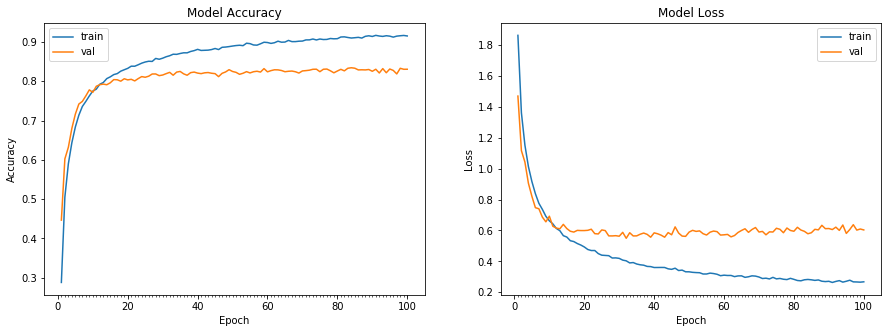

Accuracy on test data is: 83.05


In [8]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Saving the model without training
model.save_weights('model1.h5')
# Printing out the model summary
model.summary()

############# Train the Model #################################################

model.load_weights('model1.h5')
datagen = ImageDataGenerator(zoom_range=0.0,horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Saving the model after training
model.save_weights('model1_afterTraining.h5')
###############################################################################

### Base Validation Accuracy on test data is: 83.05%

### The model above shows some amount of overfitting and this would require some kind of regularization.
### Re-Running the model with below changes 
1. Using Image Normalization
2. Making use of Batch Normalization
3. Making use of L2 Regularizer
4. Properly using Dropout
5. Removed Dense layers
6. Overall reduced number of parameters from 1,172,410 to 290,090

### Results: Achieved a better Validation Accuracy of 86.06% % in first 50 epochs and 86.67% Validation Accuracy in the next 50 epochs.

In [11]:
###############################################################################
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

###############################################################################

iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy

###############################################################################

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###############################################################################

# Define the model
model2 = Sequential()
model2.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Convolution2D(32, 1, 1))


model2.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.3))

model2.add(Convolution2D(32, 1, 1))


model2.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Convolution2D(10, 1, 1))

model2.add(AveragePooling2D(pool_size = (4,4)))
model2.add(Flatten())


model2.add(Activation('softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Saving the model without training
model2.save_weights('model2.h5')
# Printing out the model summary
model2.summary()

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) -0.0049680597 1.0016385
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykerne

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)       

### Total params: 455,370 || Achieved 86.06% Validation Accuracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
390/390 [==============================] - 32s 81ms/step - loss: 1.4346 - acc: 0.5016 - val_loss: 1.1558 - val_acc: 0.6032
Epoch 2/50
390/390 [==============================] - 29s 75ms/step - loss: 0.9995 - acc: 0.6637 - val_loss: 0.9718 - val_acc: 0.6762
Epoch 3/50
390/390 [==============================] - 29s 75ms/step - loss: 0.8214 - acc: 0.7306 - val_loss: 0.7826 - val_acc: 0.7487
Epoch 4/50
390/390 [==============================] - 29s 75ms/step - loss: 0.7144 - acc: 0.7713 - val_loss: 0.7413 - val_acc: 0.7714
Epoch 5/50
390/390 [==============================] - 29s 75ms/step - loss: 0.6435 - acc: 0.7998 - val_loss: 0.7127 - val_acc: 0.7790
Epoch 6/50
390/390 [==============================] - 30s 76ms/step - loss: 0.5967 - acc: 0.8178 - val_loss: 0.6844 - val_acc: 0.7978
Epoch 7/50
390/390 [==============================] - 30s 76ms/step - loss: 0.5625 - acc: 0.8335 - val_loss: 0.6863 - val_acc: 0.7985
Epoch 8/50
390/390 [==============================] - 29s 76ms

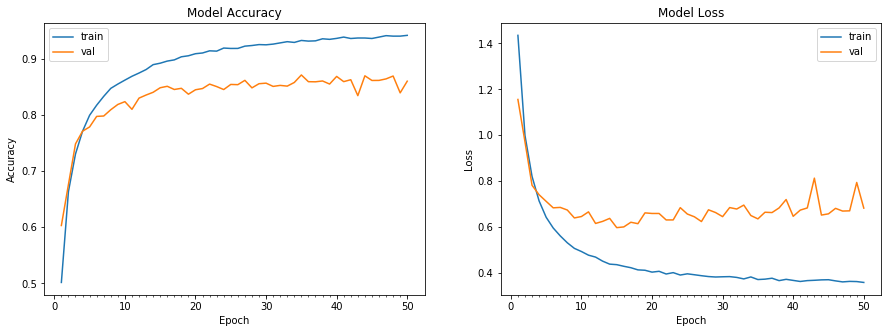

Accuracy on test data is: 86.06


In [12]:
############# Train the Model #################################################

model2.load_weights('model2.h5')
datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model2))
# Saving the model after training
model2.save_weights('model2_afterTraining.h5')

###############################################################################

### Ran for 50 more epochs and achieved 86.67 % Validation Accuracy

Epoch 1/50
  2/390 [..............................] - ETA: 28s - loss: 0.3329 - acc: 0.9492

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  


390/390 [==============================] - 29s 76ms/step - loss: 0.3667 - acc: 0.9400 - val_loss: 0.7026 - val_acc: 0.8657
Epoch 2/50
390/390 [==============================] - 29s 75ms/step - loss: 0.3653 - acc: 0.9425 - val_loss: 0.7108 - val_acc: 0.8623
Epoch 3/50
390/390 [==============================] - 29s 76ms/step - loss: 0.3651 - acc: 0.9405 - val_loss: 0.6962 - val_acc: 0.8636
Epoch 4/50
390/390 [==============================] - 29s 75ms/step - loss: 0.3605 - acc: 0.9429 - val_loss: 0.6502 - val_acc: 0.8712
Epoch 5/50
390/390 [==============================] - 29s 75ms/step - loss: 0.3627 - acc: 0.9417 - val_loss: 0.6643 - val_acc: 0.8674
Epoch 6/50
390/390 [==============================] - 29s 75ms/step - loss: 0.3628 - acc: 0.9427 - val_loss: 0.6641 - val_acc: 0.8700
Epoch 7/50
390/390 [==============================] - 29s 75ms/step - loss: 0.3574 - acc: 0.9437 - val_loss: 0.6579 - val_acc: 0.8721
Epoch 8/50
390/390 [==============================] - 29s 75ms/step - los

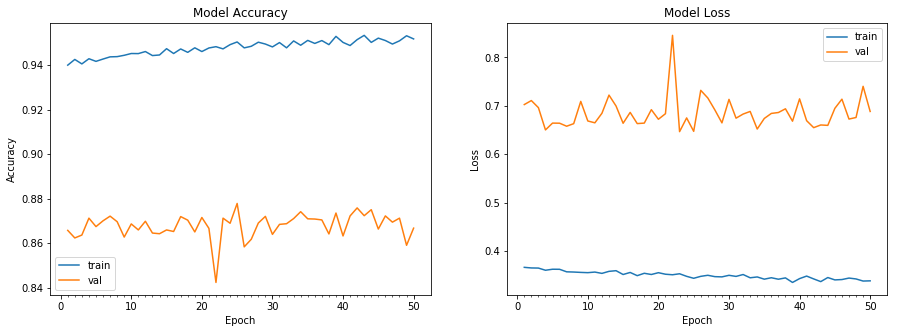

Accuracy on test data is: 86.67


In [13]:
############# Train the Model #################################################
datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (X_test, Y_test), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model2))

# Saving the model after training
model2.save_weights('model2_afterTraining_next50.h5')
###############################################################################

## Step2: Add Cutout
**After adding cutout we are getting best validation accuracy of 86.43% in 44th EPOCH**

Epoch 1/50
  1/390 [..............................] - ETA: 39s - loss: 3.2605 - acc: 0.1094

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


390/390 [==============================] - 30s 76ms/step - loss: 1.5205 - acc: 0.4706 - val_loss: 2.4239 - val_acc: 0.1786
Epoch 2/50
390/390 [==============================] - 29s 76ms/step - loss: 1.1180 - acc: 0.6234 - val_loss: 1.1585 - val_acc: 0.6164
Epoch 3/50
390/390 [==============================] - 29s 75ms/step - loss: 0.9666 - acc: 0.6810 - val_loss: 0.8724 - val_acc: 0.7171
Epoch 4/50
390/390 [==============================] - 30s 76ms/step - loss: 0.8784 - acc: 0.7135 - val_loss: 0.8926 - val_acc: 0.7208
Epoch 5/50
390/390 [==============================] - 29s 76ms/step - loss: 0.8043 - acc: 0.7446 - val_loss: 0.7607 - val_acc: 0.7655
Epoch 6/50
390/390 [==============================] - 30s 76ms/step - loss: 0.7553 - acc: 0.7609 - val_loss: 0.7549 - val_acc: 0.7670
Epoch 7/50
390/390 [==============================] - 30s 76ms/step - loss: 0.7172 - acc: 0.7797 - val_loss: 0.6564 - val_acc: 0.8027
Epoch 8/50
390/390 [==============================] - 30s 76ms/step - los

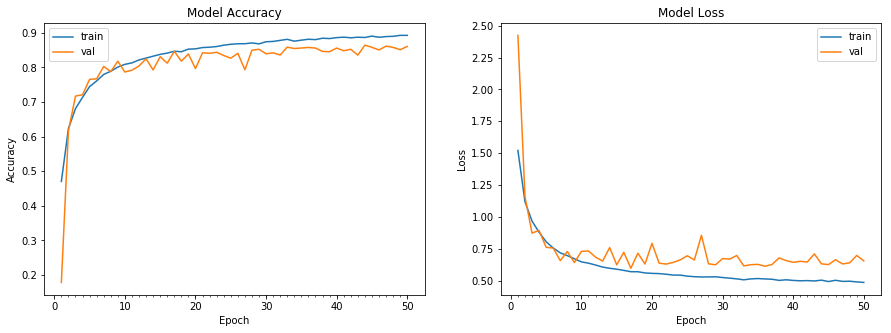

Accuracy on test data is: 83.05


In [43]:
######################### CUT OUT #############################################

# Defining the function to apply CUTOUT on the input images
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser
##############################
# Initializing the model
model2.load_weights('model2.h5')
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, 
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))
model2.save_weights('model2_withCutout_afterTraining.h5')

#######################################################################################################################


## Step3: Use LR Finder

### Using LR Finder we found out that best starting learning rate for our model is around 0.049


---


**Changing LR**
* If the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny.
* If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse.
* The training should start from a relatively large learning rate because, in the beginning, random weights are far from optimal, and then the learning rate can decrease during training to allow more fine-grained weight updates.

**To Find Best LR**
* Record the learning rate and training loss for every batch. Then, plot the loss and the learning rate.
* First, with low learning rates, the loss improves slowly, then training accelerates until the learning rate becomes too large and loss goes up: the training process diverges.
* We need to select a point on the graph with the fastest decrease in the loss.


---


**Reference:**
1. https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
2. https://github.com/surmenok/keras_lr_finder

In [14]:
# Install the Keras LR Finder Library
!pip install keras-lr-finder

In [16]:
from keras_lr_finder.lr_finder import LRFinder

# model is a Keras model
model2.load_weights('model2.h5')
lr_finder = LRFinder(model2)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(train_features, train_labels, start_lr=0.0001, end_lr=1, batch_size=128, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 29s 581us/step - loss: 1.5516 - acc: 0.4600
Epoch 2/10
50000/50000 [==============================] - 29s 578us/step - loss: 1.1682 - acc: 0.5990
Epoch 3/10
50000/50000 [==============================] - 29s 577us/step - loss: 1.0015 - acc: 0.6645
Epoch 4/10
50000/50000 [==============================] - 29s 576us/step - loss: 0.9070 - acc: 0.7045
Epoch 5/10
50000/50000 [==============================] - 29s 575us/step - loss: 0.9330 - acc: 0.7106
Epoch 6/10
50000/50000 [==============================] - 29s 571us/step - loss: 1.0718 - acc: 0.7074
Epoch 7/10
50000/50000 [==============================] - 29s 575us/step - loss: 1.3850 - acc: 0.6663
Epoch 8/10
38784/50000 [======================>.......] - ETA: 6s - loss: 1.8967 - acc: 0.5787

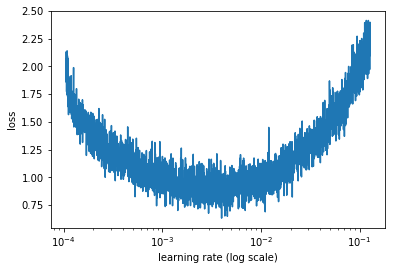

In [42]:
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

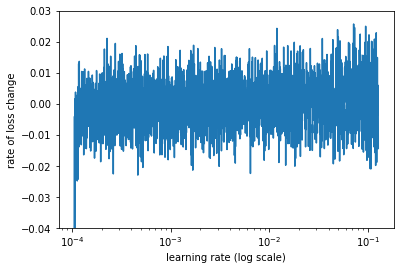

In [26]:
lr_finder.plot_loss_change(sma=20, n_skip_beginning=20, n_skip_end=5, y_lim=(-0.04, 0.03))

In [41]:
 def get_derivatives(lr_finder, sma):
        assert sma >= 1
        derivatives = [0] * sma
        for i in range(sma, len(lr_finder.lrs)):
            derivatives.append((lr_finder.losses[i] - lr_finder.losses[i - sma]) / sma)
        # print(np.argmax(derivatives[10:-5]))
        return derivatives

def get_best_lr(lr_finder, sma, n_skip_beginning=10, n_skip_end=5):
        derivatives = get_derivatives(lr_finder, sma)
        best_der_idx = np.argmax(derivatives[n_skip_beginning:-n_skip_end])
        return lr_finder.lrs[n_skip_beginning:-n_skip_end][best_der_idx]

print(get_best_lr(lr_finder, sma = 1))

0.04944741


## STEP 4: Use SDG with Momentum

## STEP 5: Train for 100 Epochs.

## STEP 6: Print the top accuracy
**We are getting 86.52% as the best Validation Accuracy in 83rd Epoch.**

## Step 7: Show Training and Test Accuracy curves

---


**Stochastic Gradient Descent**
* When training input is very large, gradient descent is quite slow to converge. Stochastic Gradient Descent is the preferred variation of gradient descent which estimates the gradient from a small sample of randomly chosen training input in each iteration called minibatches.

**SGD with Momentum**
* **SGD with momentum** is method which helps accelerate gradients vectors in the right directions, thus leading to faster converging.
* This technique modifies the standard SGD by introducing velocity v , which is the parameter we are trying to optimize, and friction μ, which tries to control the velocity and prevents overshooting the valley while allowing faster descent.
* The advantage of momentum is that it makes very small change to SGD but provides a big boost to speed of learning.
* The idea behind **Nesterov’s momentum** is that instead of calculating the gradient at the current position, we calculate the gradient at a position that we know our momentum is about to take us, called as “look ahead” position. 

---

**Reference**:
1. https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d
2. https://keras.io/optimizers/
3. https://deepnotes.io/sgd-momentum-adaptive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  from ipykernel import kernelapp as app


Epoch 1/100
390/390 [==============================] - 28s 73ms/step - loss: 1.7659 - acc: 0.3823 - val_loss: 1.5289 - val_acc: 0.4655
Epoch 2/100
390/390 [==============================] - 26s 68ms/step - loss: 1.2534 - acc: 0.5707 - val_loss: 1.2996 - val_acc: 0.5800
Epoch 3/100
390/390 [==============================] - 27s 68ms/step - loss: 1.0645 - acc: 0.6454 - val_loss: 1.0230 - val_acc: 0.6678
Epoch 4/100
390/390 [==============================] - 27s 68ms/step - loss: 0.9570 - acc: 0.6880 - val_loss: 0.8965 - val_acc: 0.7134
Epoch 5/100
390/390 [==============================] - 27s 68ms/step - loss: 0.8846 - acc: 0.7159 - val_loss: 0.9236 - val_acc: 0.7199
Epoch 6/100
390/390 [==============================] - 27s 69ms/step - loss: 0.8309 - acc: 0.7376 - val_loss: 0.7760 - val_acc: 0.7612
Epoch 7/100
390/390 [==============================] - 27s 68ms/step - loss: 0.7962 - acc: 0.7531 - val_loss: 0.7845 - val_acc: 0.7572
Epoch 8/100
390/390 [==============================] - 

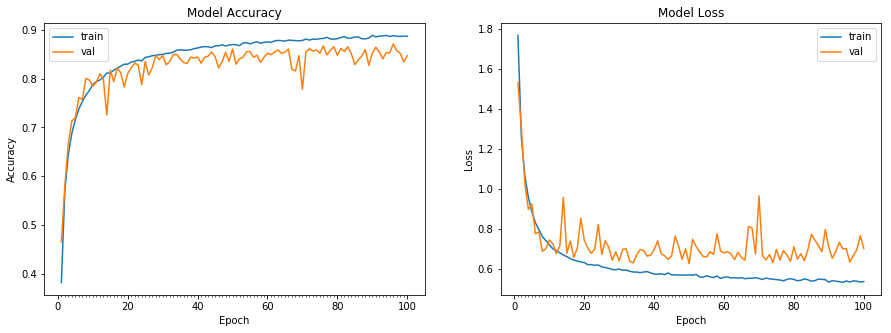

Accuracy on test data is: 84.68


In [46]:
model2.load_weights('model2.h5')
sgd = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

###########################################################
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, 
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))

# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))
model2.save_weights('model2_withCutout_withSGDMomentum_afterTraining.h5')

## Step 8: Run GradCAM on the any 25 misclassified images. 

Make sure you mention what is the prediction and what was the ground truth label.

---

**GRADCAM**
Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept, flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.



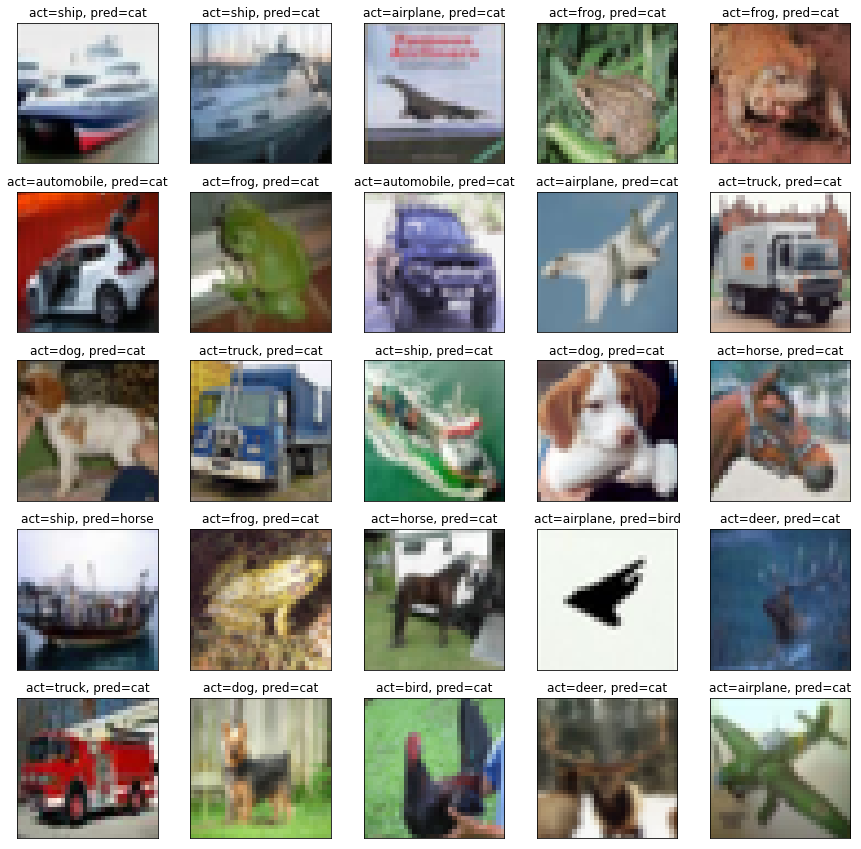

In [99]:
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing import image

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

count = 0
misclassified_images = [] # index, original, predicted
model2.load_weights('model2_withCutout_withSGDMomentum_afterTraining.h5')
for idx, single_prediction in enumerate(model2.predict(test_features)):
    # print(np.argmax(single_prediction), y_test[idx][0])
    predicted_class = np.argmax(single_prediction)
    if(predicted_class != y_test[idx][0]):
      count+=1
      misclassified_images.append((idx, y_test[idx][0], predicted_class))
      if(count==25):
        break

# print(misclassified_images)
###############################################################################
fig = plt.figure(figsize=(15, 15))
for index, (img_idx, original, prediction) in enumerate(misclassified_images):
  ax = fig.add_subplot(5, 5, 1 + index, xticks=[], yticks=[])
  im = test_features[img_idx]
  ax.set_title('act=' + class_names[original] + ', pred=' + class_names[prediction])
  plt.imshow(im)
plt.show()

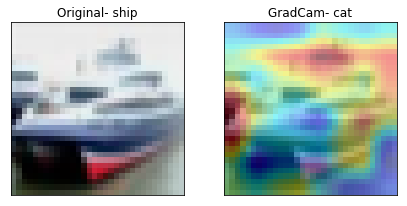

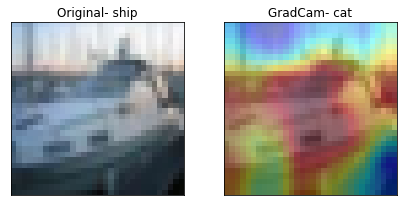

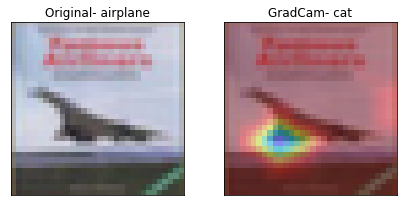

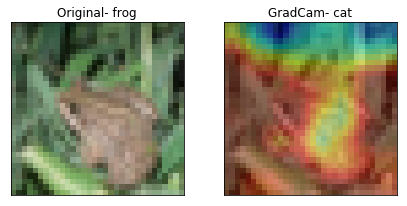

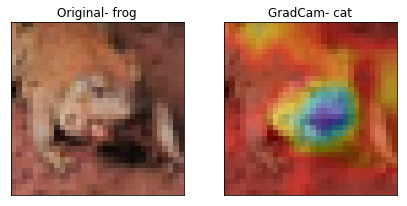

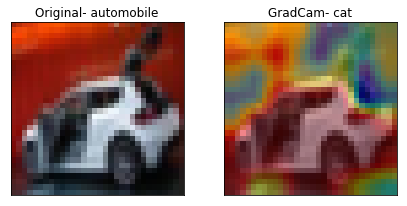

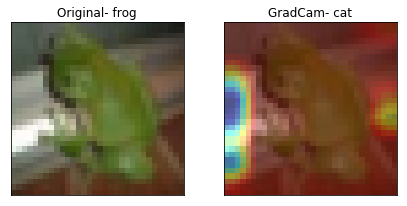

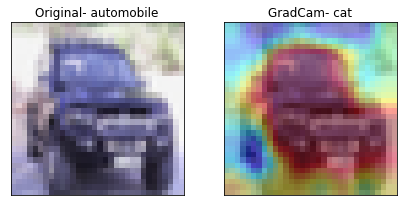

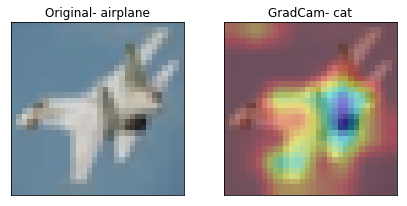

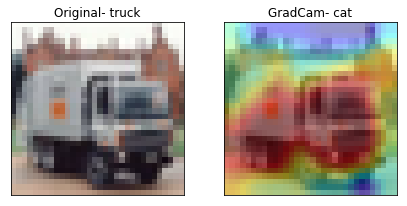

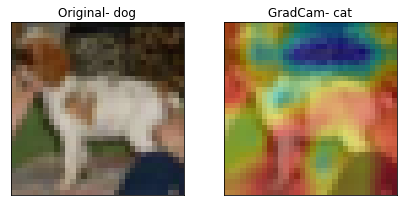

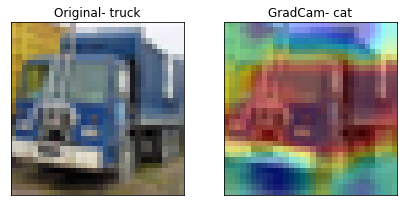

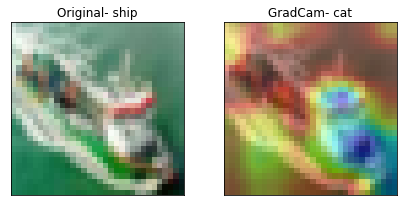

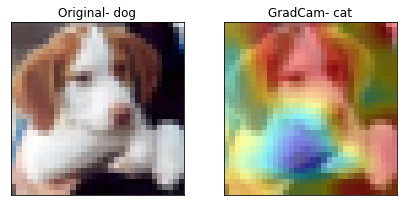

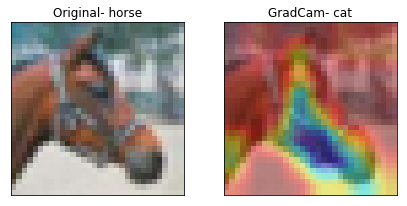

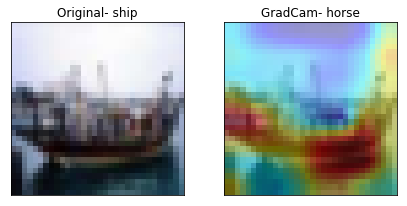

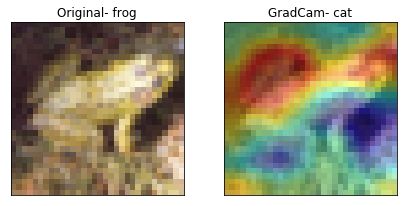

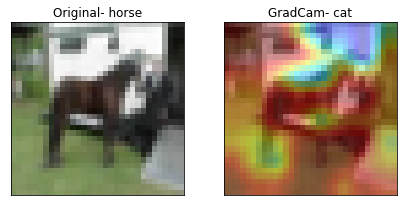

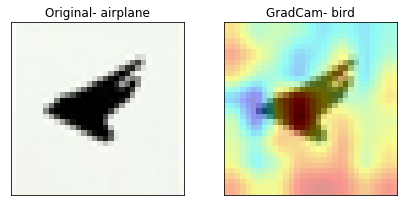

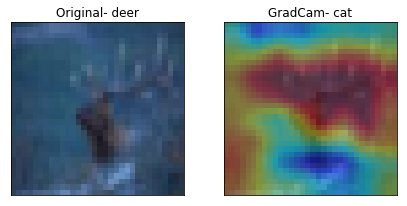

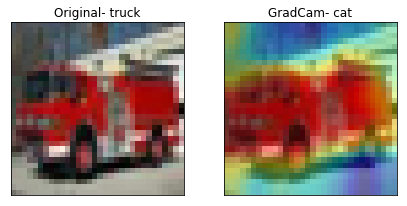

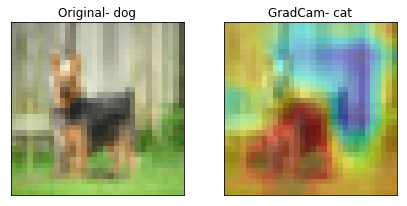

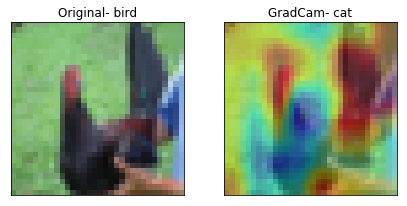

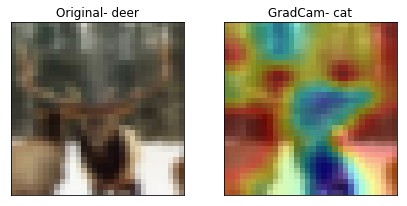

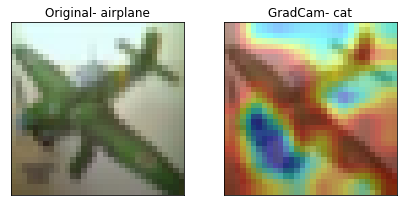

In [128]:
plt.rcParams.update({'figure.max_open_warning': 0})
###############################################################################
# Function to create the required HeatMap
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
(train_features_org, train_labels_org), (test_features_org, test_labels_org) = cifar10.load_data()
test_features = test_features.astype('float32')/255

###############################################################################
def createHeatMap(img, img_idx, class_output, last_conv_layer, name_of_layer):

  x = img
  x = np.expand_dims(x, axis=0)

  # print("\nCreating the HEAT Map from layer named: ", name_of_layer)
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  # print("grads.shape = ", grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  # print("pooled_grads.shape = ", pooled_grads.shape)
  iterate = K.function([model2.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(256):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  # print("conv_layer_output_value.shape = ", conv_layer_output_value.shape)
  # print("heatmap.shape = ", heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)


  img = test_features_org[img_idx]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)


  fig = plt.figure(figsize=(7, 7))
  # fig = plt.figure(figsize=(10, 10))
  
  ax = fig.add_subplot(2, 2, 1, xticks=[], yticks=[])
  ax.set_title("Original- " + class_names[original])
  plt.imshow(img)

  ax = fig.add_subplot(2, 2, 2, xticks=[], yticks=[])
  ax.set_title("GradCam- " + class_names[prediction])
  plt.imshow(superimposed_img)

###############################################################################
last_conv_layer = model2.get_layer("conv2d_23")


for index, (img_idx, original, prediction) in enumerate(misclassified_images):
  # class_idx for sunglasses
  # class_idx = 837
  class_output = model2.output[:, prediction]
  img = test_features[img_idx]
  # Creating the Heat Map for Layer Named: block5_conv1
  createHeatMap(img, img_idx, class_output, last_conv_layer, "conv2d_23")

###############################################################################